In [14]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = [20, 16]
plt.rcParams.update({'font.size': 15})

Populating the interactive namespace from numpy and matplotlib


In [15]:
def housingBuyingDecisionBoundary(Vgrid, V_solve):
    # wealth discretization
    wealthLevel = 300
    polynomialDegree = 1
    numberOfWealthLevel = 400
    ws = jnp.linspace(0, np.power(wealthLevel,1/polynomialDegree), numberOfWealthLevel)**polynomialDegree

    intendedBuyer = []
    ages = []
    for age in range(21, 50):
        for w in ws:
            t = age - 20
            # x = [w,ab,s,e,o,z]
            x = [w, 0, 0, 1, 0, 1]
            # a = [c,b,k,h,action]
            _,a = V_solve(t,Vgrid[:,:,:,:,:,:,t+1],x)
            if a[4] == 1:
                ages.append(age)
                intendedBuyer.append(w)
                break
    return ages, intendedBuyer

In [16]:
# valueFunction1 = "richLow_0.06_4.0.npy"
# plt.figure()
# from solveMDP_copy import * 
# vgrid_whole = np.load(valueFunction1)
# ages, wealthLevel =housingBuyingDecisionBoundary(vgrid_whole,  V_solve = V_solve)
# plt.plot(ages, wealthLevel, 'o-', label = "with_401k_lowBeta")
# from shutDownRetirement.solveMDP_copy import *
# vgrid_shutDownRetirement = np.load("shutDownRetirement/" + valueFunction1)
# ages, wealthLevel = housingBuyingDecisionBoundary(vgrid_shutDownRetirement, V_solve = V_solve)
# plt.plot(ages, wealthLevel, 'o-', label = "without_401k_lowBeta")

# plt.legend()

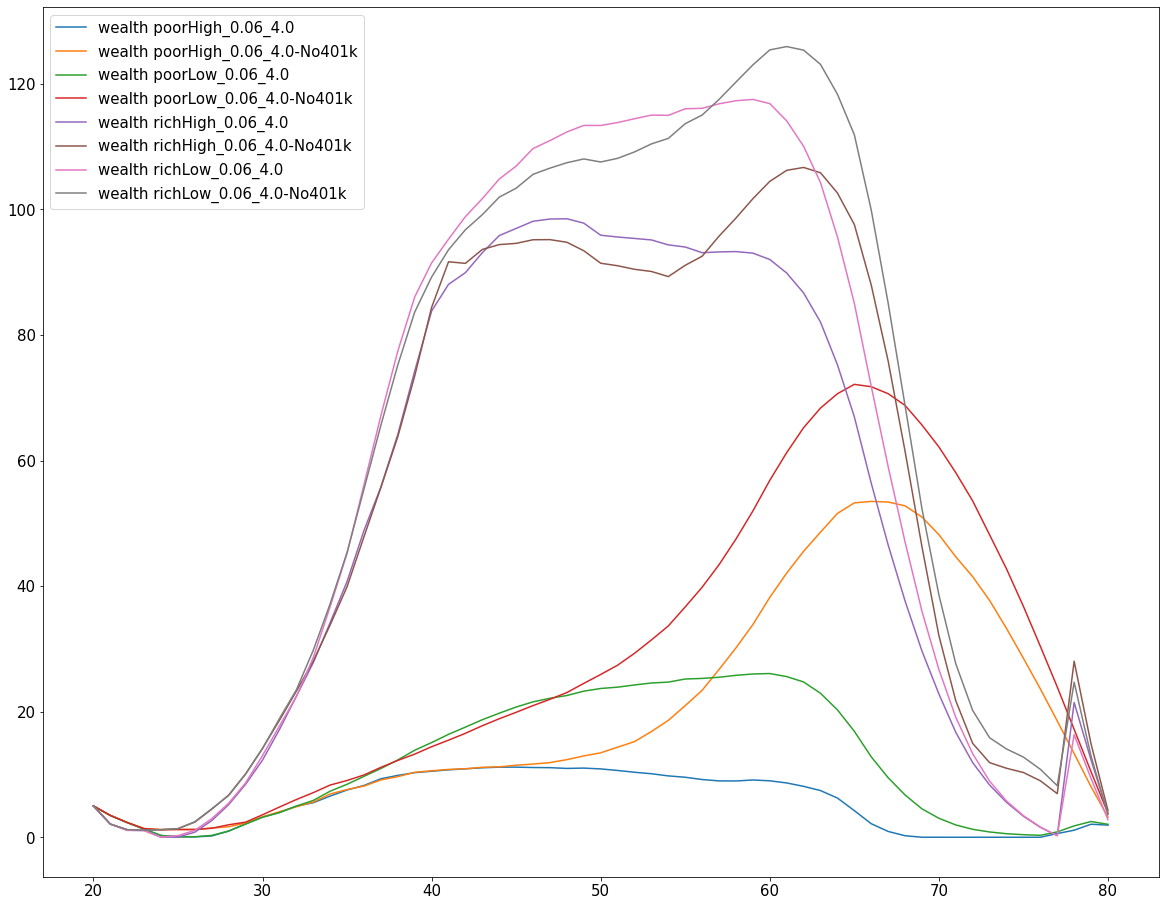

In [17]:
Gamma = [4.0]
Beta_r = [0.06]
AgentType = ["poorHigh","poorLow","richHigh","richLow"]

for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge+1),np.mean(wwww,axis = 1), label = "wealth " + fileName)

            waseozcbkhm = np.load("shutDownRetirement/parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge+1),np.mean(wwww,axis = 1), label = "wealth " + fileName + "-No401k")

plt.legend()

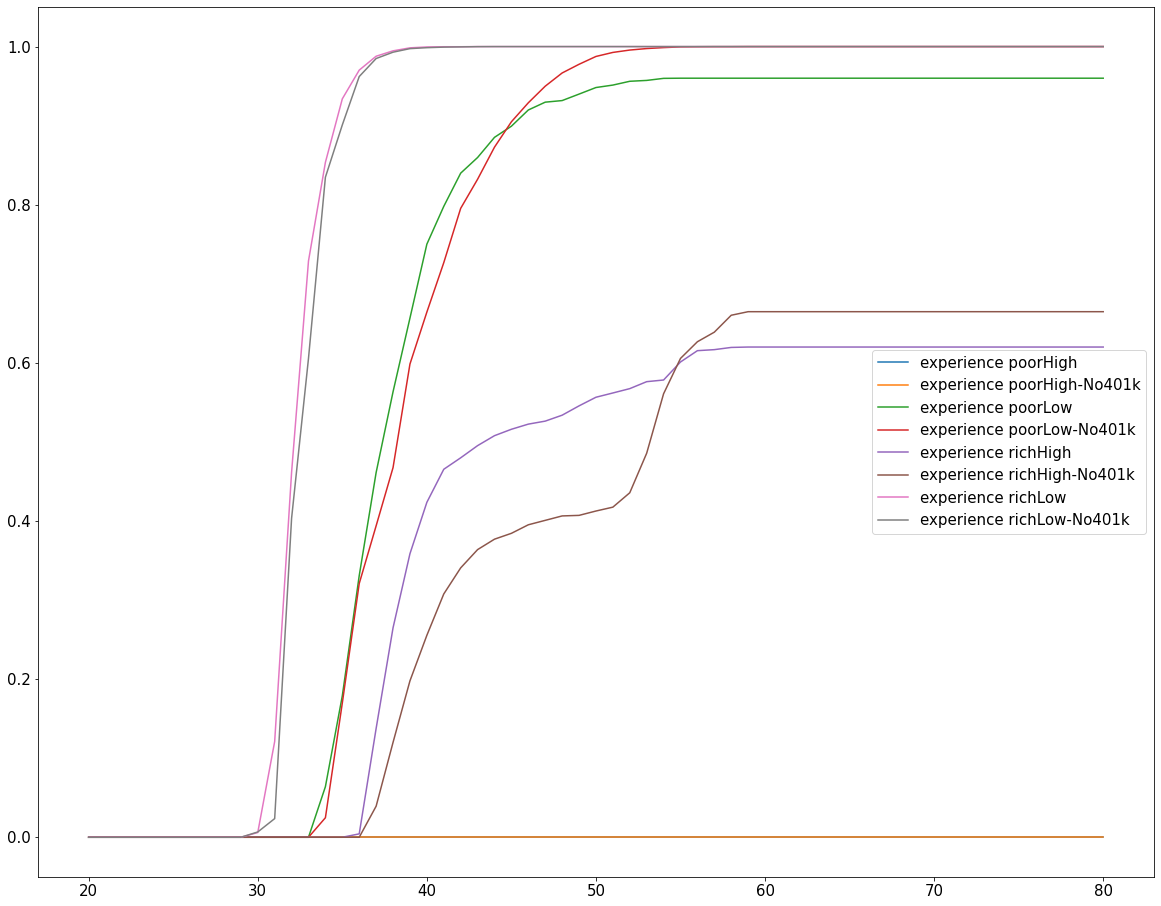

In [18]:
plt.figure()
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge+1),np.mean(zzzz,axis = 1), label = "experience " + agentType)

            waseozcbkhm = np.load("shutDownRetirement/parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge+1),np.mean(zzzz,axis = 1), label = "experience " + agentType + "-No401k")
plt.legend()

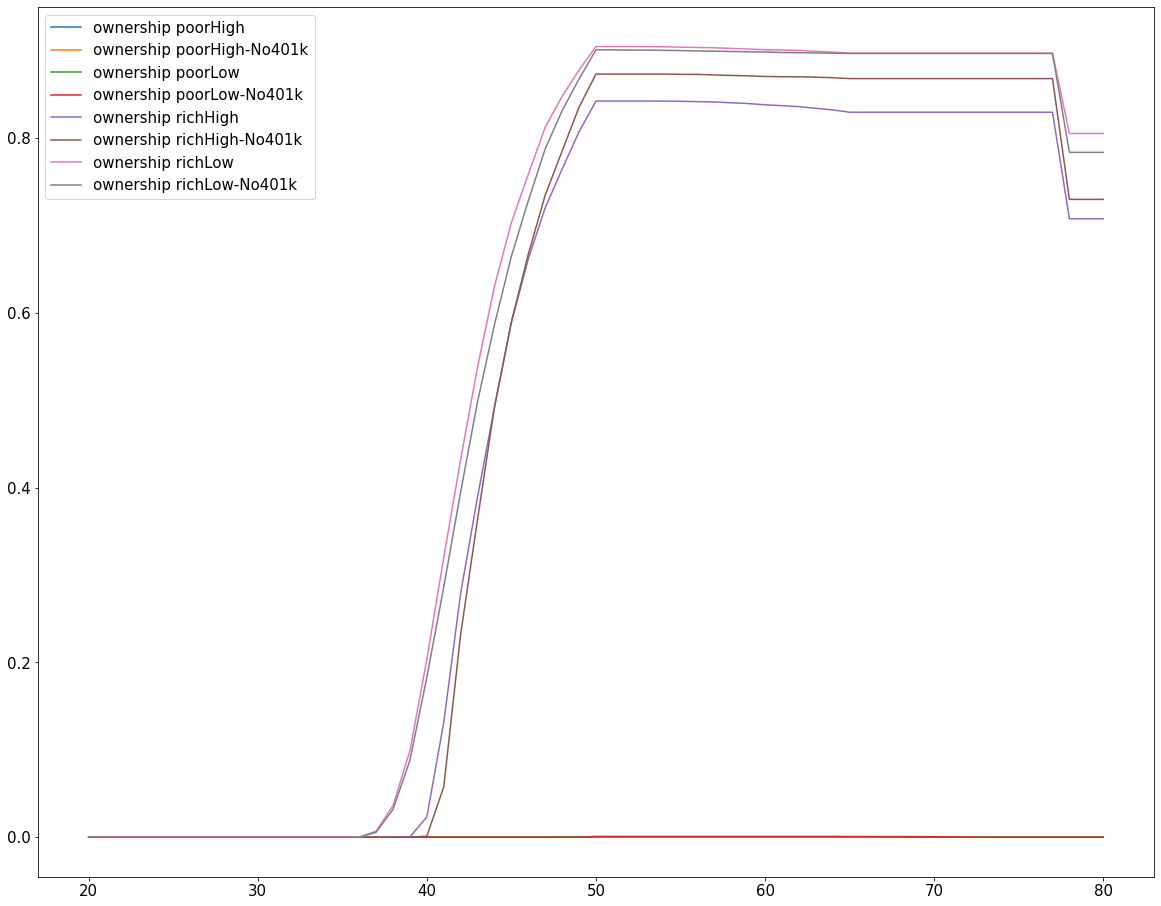

In [19]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge+1),np.mean(oooo,axis = 1), label = "ownership " + agentType)

            waseozcbkhm = np.load("shutDownRetirement/parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge+1),np.mean(oooo,axis = 1), label = "ownership " + agentType + "-No401k")
plt.legend()

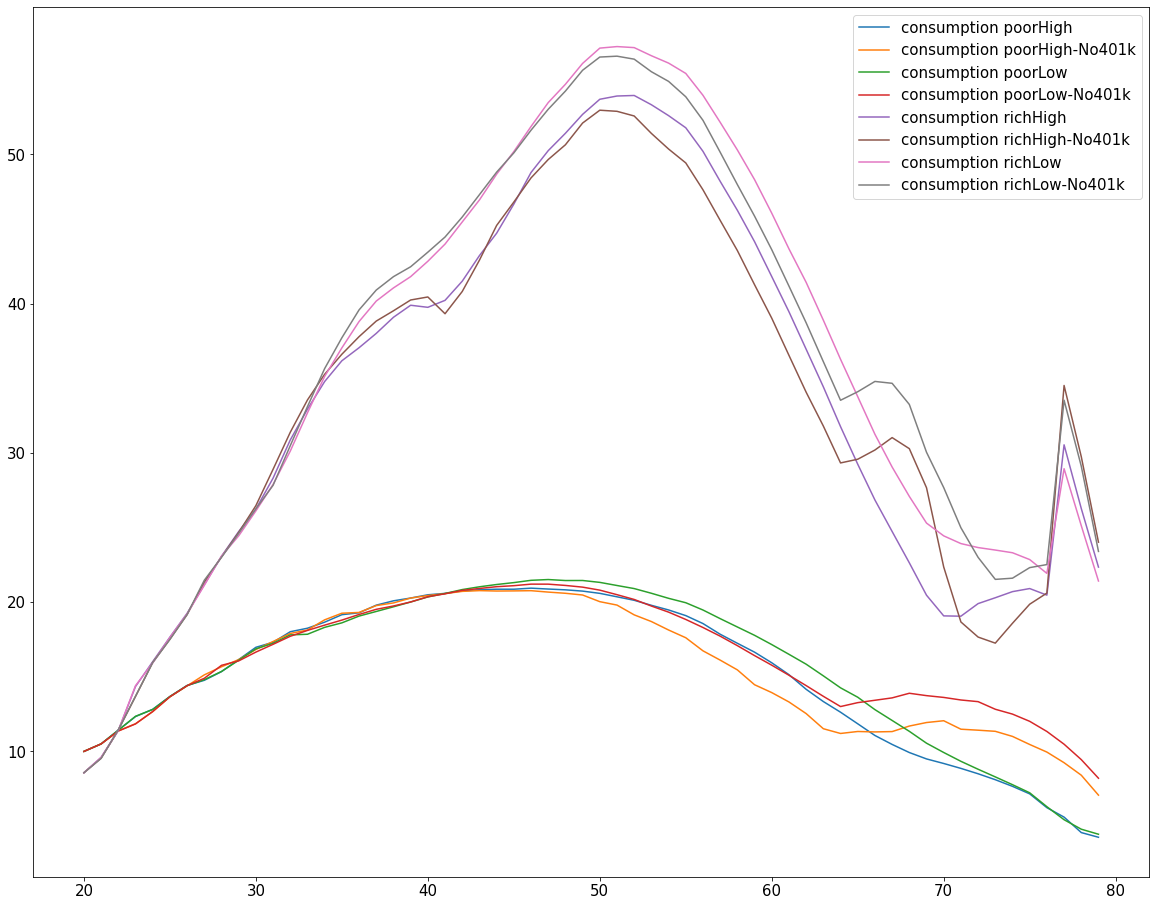

In [20]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(cccc,axis = 1), label = "consumption " + agentType)

            waseozcbkhm = np.load("shutDownRetirement/parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(cccc,axis = 1), label = "consumption " + agentType + "-No401k")
plt.legend()

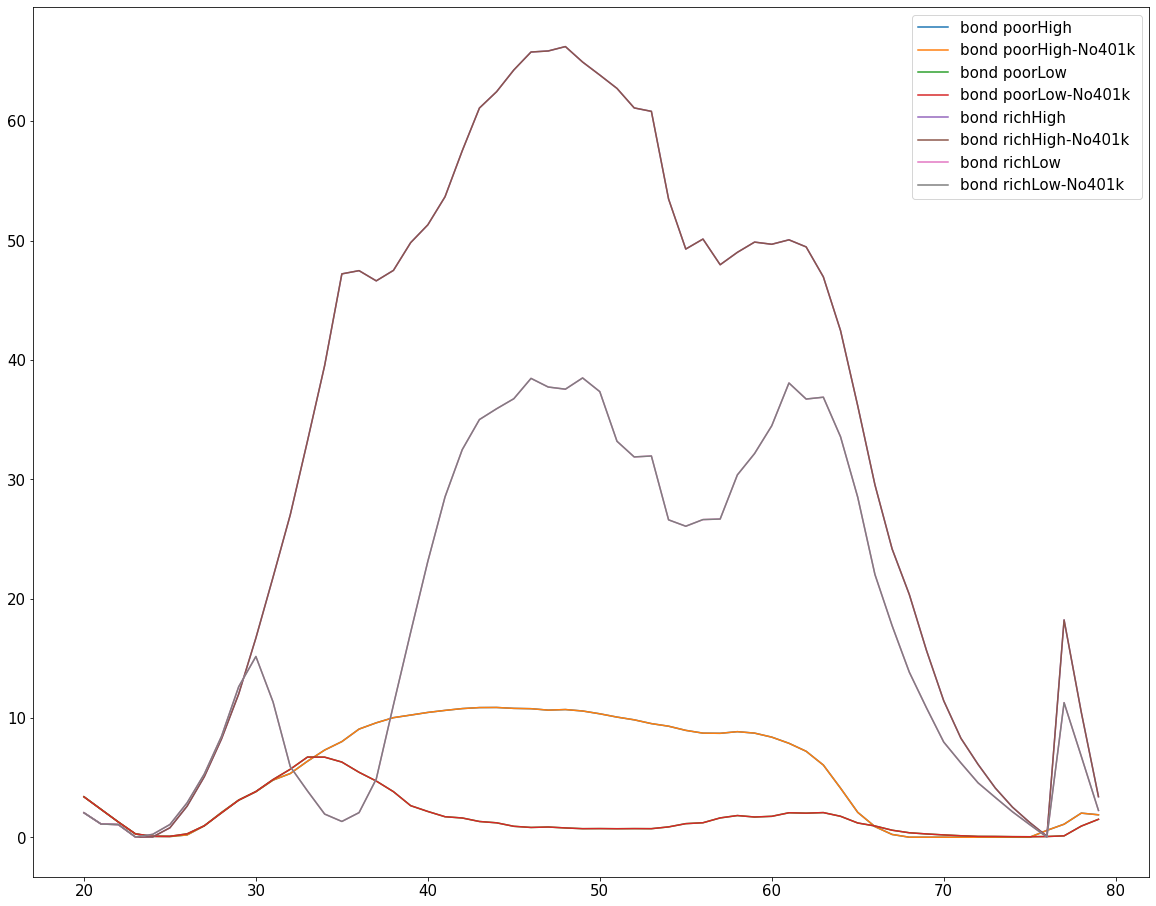

In [21]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(bbbb,axis = 1), label = "bond " + agentType)

            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(bbbb,axis = 1), label = "bond " + agentType + "-No401k")
plt.legend()

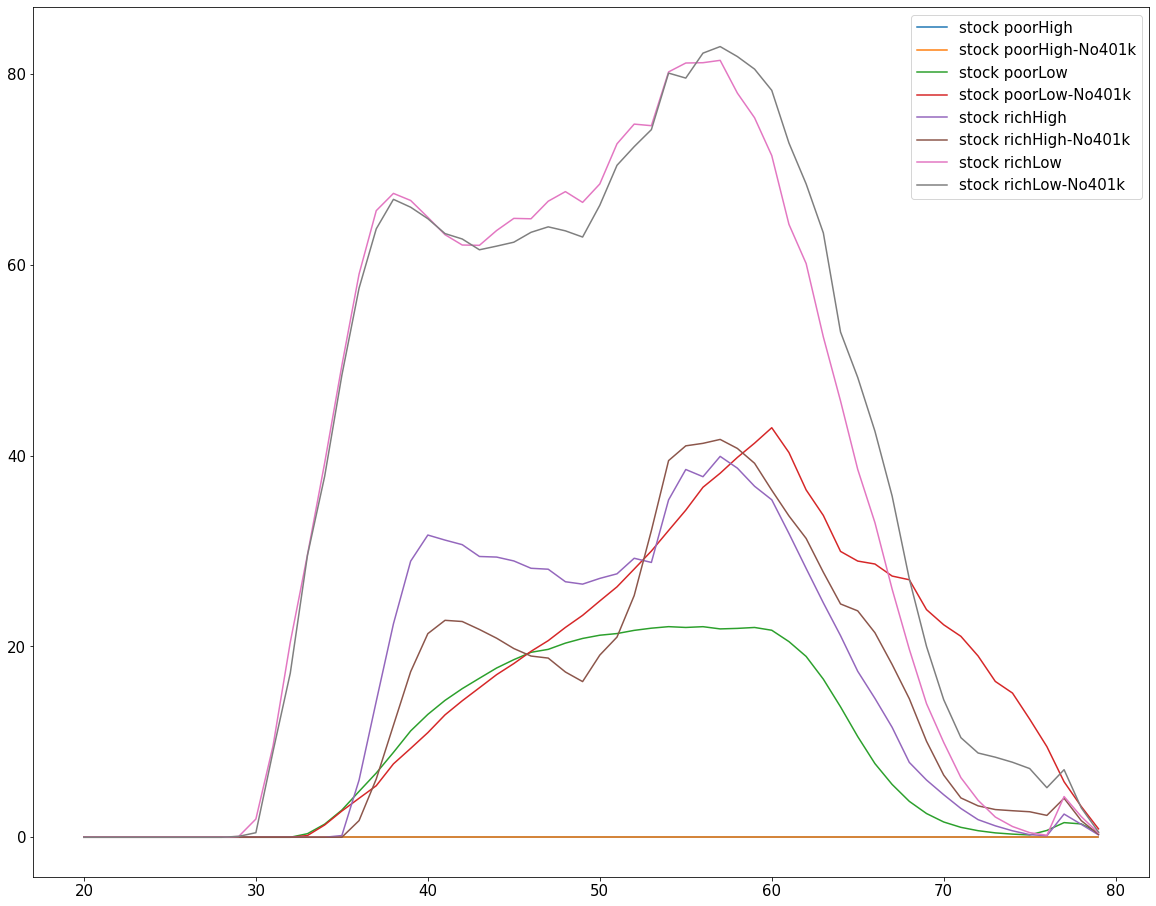

In [22]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(kkkk,axis = 1), label = "stock " + agentType)
            
            waseozcbkhm = np.load("shutDownRetirement/parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(kkkk,axis = 1), label = "stock " + agentType + "-No401k")
plt.legend()

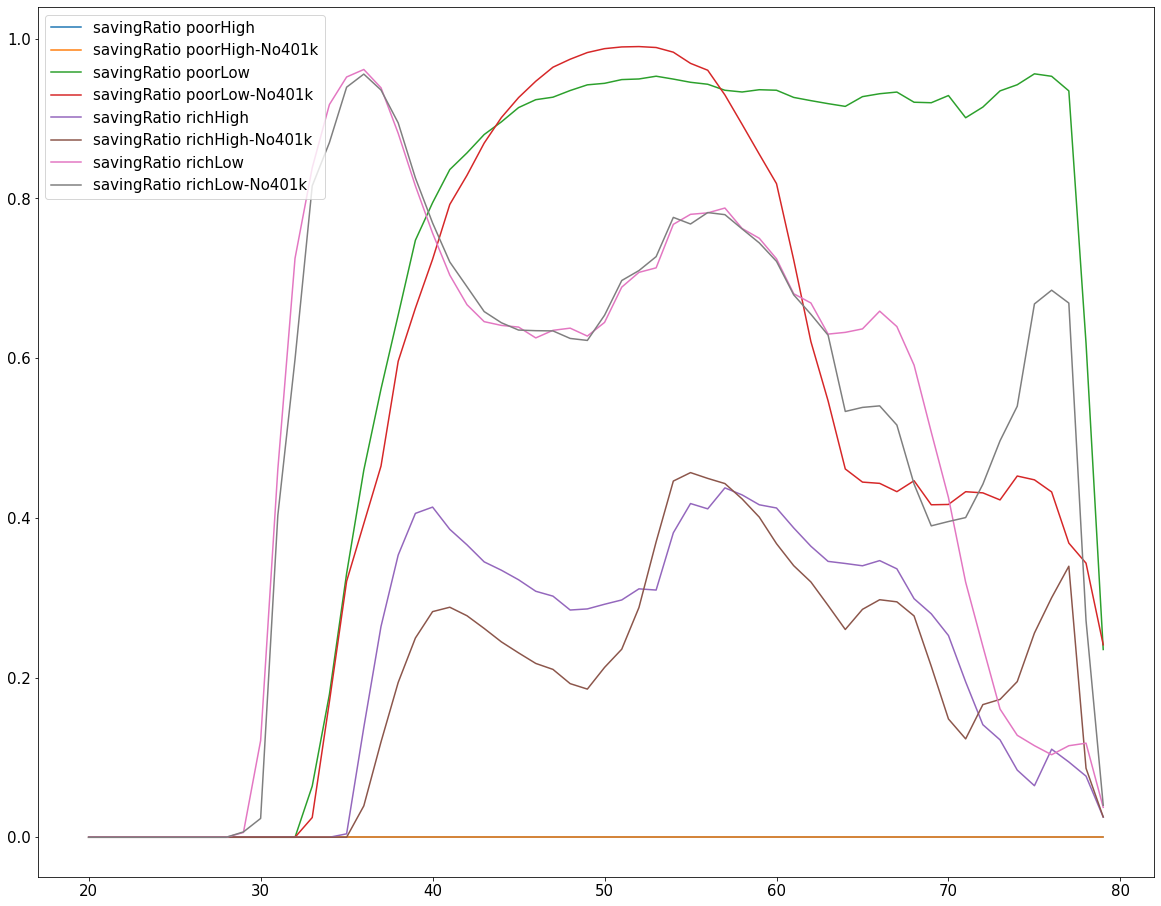

In [23]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(kkkk/(bbbb+kkkk),axis = 1), label = "savingRatio " + agentType)
            
            waseozcbkhm = np.load("shutDownRetirement/parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(kkkk/(bbbb+kkkk),axis = 1), label = "savingRatio " + agentType + "-No401k")
plt.legend()

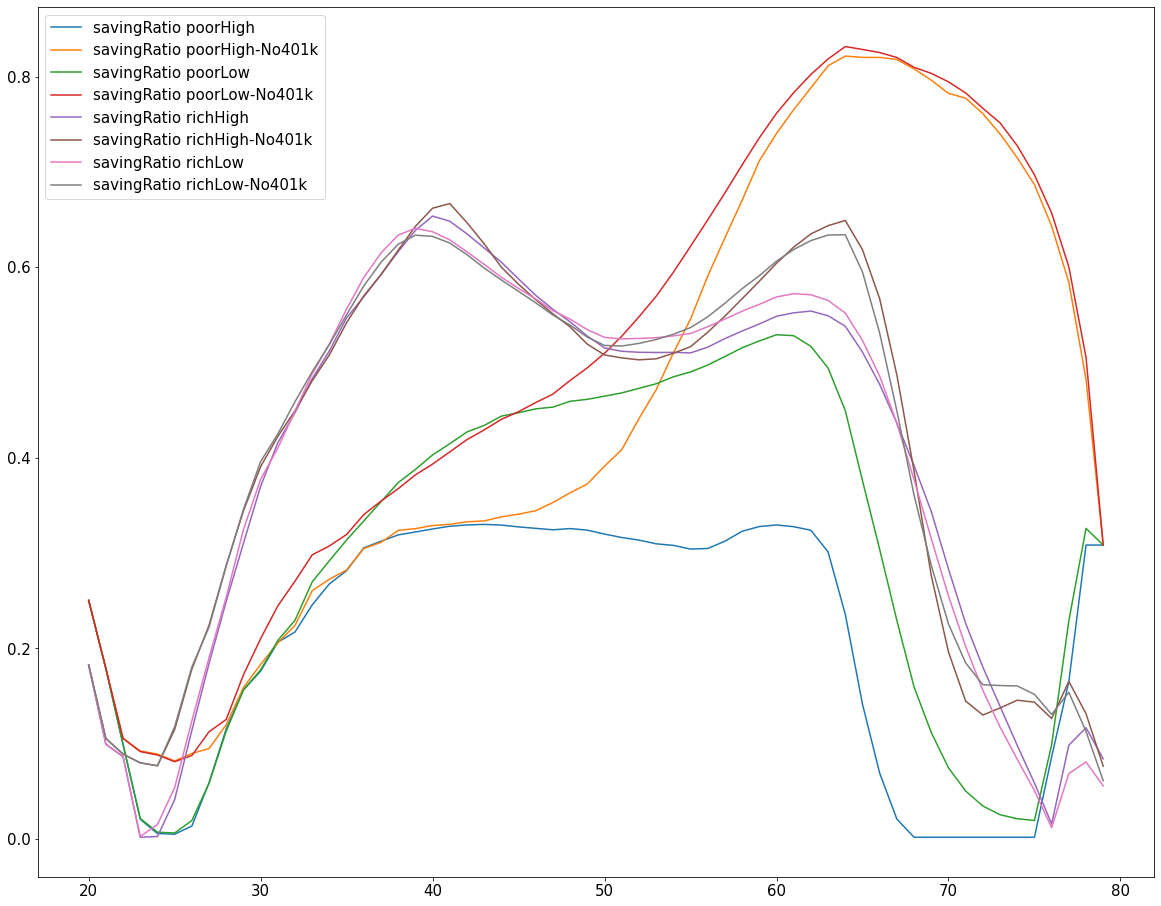

In [28]:
for gamma in Gamma:
    for beta_r in Beta_r:
        waseozcbkhmType = []
        for agentType in AgentType:
            ### load in the data 
            fileName = agentType + "_" + str(beta_r) + "_" + str(gamma)
            waseozcbkhm = np.load("parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(((bbbb+kkkk)/((cccc+cccc*(4/6)*oooo[:60,:])+bbbb+kkkk)),axis = 1), label = "savingRatio " + agentType)
            
            waseozcbkhm = np.load("shutDownRetirement/parallel_waseozcbkhm_" + fileName + ".npy", allow_pickle=True)
            # [ws,ab,ss,es,os,zs,cs,bs,ks,hs,ms]
            wwww, aaaa, ssss, eeee, oooo, zzzz, cccc, bbbb, kkkk, hhhh, mmmm = waseozcbkhm
            startAge = 20
            # value of states, state has one more value, since the terminal state does not have associated action
            plt.plot(range(startAge, T_max + startAge),np.mean(((bbbb+kkkk)/((cccc+cccc*(4/6)*oooo[:60,:])+bbbb+kkkk)),axis = 1), label = "savingRatio " + agentType + "-No401k")
plt.legend()